NLP exercise 

- Import NLTK and download the functions you will need (as you go along if necessary).
- Get the text of a press article of your choice from the internet (in English it will be easier, but you can take the language of your choice). Assign it to a variable by copying and pasting it into your notebook. For the sake of simplicity, we advise you to take a text that is between 10 and 30 lines long. 
- Transform your text into sentence tokens
- Transform your text into word tokens
- Count the frequency of occurrence of each word and make a graph (if possible a bar chart) representing the 20 most frequent words in your text. Are there many words that seem like stop words to you?
- Remove the stop words and punctuation, and look again at which words are most present. Again, make the same graph to compare.

In [40]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
# regex for removing punctuation!
import re

In [3]:
#text from BBC
text= "Sweden's first female prime minister has been reappointed to the top job after political turmoil forced her to resign within hours of taking the post last week. MPs backed Social Democratic Party leader Magdalena Andersson by a narrow margin in a new vote on Monday. She will attempt to lead a one-party government until an election in September next year. She stood down as prime minister last Thursday after her coalition collapsed. Just hours earlier, Ms Andersson had been elected as Sweden's first female prime minister by a single vote in parliament. But the 54-year-old economist's plan for forming a new coalition government with the Green Party was thrown into disarray when her budget proposal failed to pass. Sweden's first female PM resigns hours after appointment. Instead, parliament voted for a budget drawn up by a group of opposition parties, including the far-right Sweden Democrats. The Green Party said it would not accept a budget drafted by the far-right and walked away from the government, leading to its demise. By convention, the prime minister in Sweden is expected to resign if a coalition party leaves government. In Monday's vote in Sweden's parliament, the Riksdag, 101 of its 349 members voted yes, 75 abstained and 173 voted no. To be appointed prime minister under Sweden's political system, a candidate only needs to avoid a majority voting against them. At a news conference after the vote, Ms Andersson said she was ready to 'take Sweden forward' with a programme focused on welfare, climate change and crime. But without the support of other parties, Ms Andersson will struggle to pass legislation in parliament, where the centre-left Social Democrats hold 100 of 349 seats."

#### Tokenize

In [5]:
#tokenization into sentence.
sentence_token = nltk.sent_tokenize(text)
sentence_token

["Sweden's first female prime minister has been reappointed to the top job after political turmoil forced her to resign within hours of taking the post last week.",
 'MPs backed Social Democratic Party leader Magdalena Andersson by a narrow margin in a new vote on Monday.',
 'She will attempt to lead a one-party government until an election in September next year.',
 'She stood down as prime minister last Thursday after her coalition collapsed.',
 "Just hours earlier, Ms Andersson had been elected as Sweden's first female prime minister by a single vote in parliament.",
 "But the 54-year-old economist's plan for forming a new coalition government with the Green Party was thrown into disarray when her budget proposal failed to pass.",
 "Sweden's first female PM resigns hours after appointment.",
 'Instead, parliament voted for a budget drawn up by a group of opposition parties, including the far-right Sweden Democrats.',
 'The Green Party said it would not accept a budget drafted by the

In [6]:
#Tokenization into word
text_to_word = nltk.word_tokenize(text)
text_to_word[:10]

['Sweden',
 "'s",
 'first',
 'female',
 'prime',
 'minister',
 'has',
 'been',
 'reappointed',
 'to']

### Frequency distribution

In [7]:
#Using frequency ditribution and most_comm to identify the 20 most recurring words 
fdist = nltk.FreqDist(text_to_word)
text_to_word_common = fdist.most_common(20)

In [8]:
text_to_word_common

[('.', 14),
 ('a', 13),
 (',', 13),
 ('the', 12),
 ('to', 9),
 ('Sweden', 8),
 ("'s", 7),
 ('in', 6),
 ('prime', 5),
 ('minister', 5),
 ('of', 5),
 ('after', 4),
 ('Andersson', 4),
 ('by', 4),
 ('vote', 4),
 ('government', 4),
 ('parliament', 4),
 ('first', 3),
 ('female', 3),
 ('her', 3)]

In [9]:
#Defining a DF to use it for a graph 
most_common_words = pd.DataFrame(text_to_word_common)
most_common_words=most_common_words.rename(columns={0: "Words", 1: "Count"})

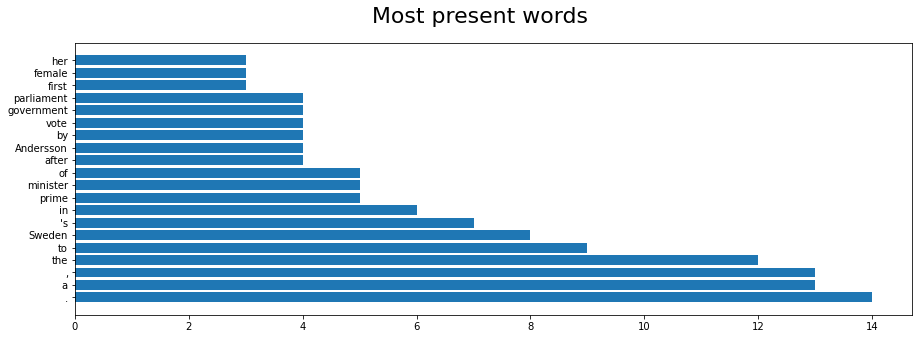

In [61]:
fig, ax = plt.subplots(figsize = (15,5))
fig.suptitle("Most present words", size = 22)
p1 = ax.barh("Words", data=most_common_words, width="Count")


Removing stop words and punctuation 

In [18]:
stop_words = nltk.corpus.stopwords.words("english")

In [19]:
tokens_clean = []
for words in text_to_word:
  if words not in stop_words:
    tokens_clean.append(words)

In [22]:
tokens_clean = str(tokens_clean)

In [24]:
cleaned = re.sub('\W+', ' ', tokens_clean)
cleaned

' Sweden s first female prime minister reappointed top job political turmoil forced resign within hours taking post last week MPs backed Social Democratic Party leader Magdalena Andersson narrow margin new vote Monday She attempt lead one party government election September next year She stood prime minister last Thursday coalition collapsed Just hours earlier Ms Andersson elected Sweden s first female prime minister single vote parliament But 54 year old economist s plan forming new coalition government Green Party thrown disarray budget proposal failed pass Sweden s first female PM resigns hours appointment Instead parliament voted budget drawn group opposition parties including far right Sweden Democrats The Green Party said would accept budget drafted far right walked away government leading demise By convention prime minister Sweden expected resign coalition party leaves government In Monday s vote Sweden s parliament Riksdag 101 349 members voted yes 75 abstained 173 voted To app

In [27]:
cleaned_words = nltk.word_tokenize(cleaned)

In [28]:
fdist_clean = nltk.FreqDist(cleaned_words)
most_common_words_clean = fdist_clean.most_common(20)

In [29]:
#The twenty most common words after removing punctuation and stop words 
most_common_words_clean

[('Sweden', 8),
 ('s', 7),
 ('prime', 5),
 ('minister', 5),
 ('Andersson', 4),
 ('vote', 4),
 ('government', 4),
 ('parliament', 4),
 ('first', 3),
 ('female', 3),
 ('hours', 3),
 ('Party', 3),
 ('coalition', 3),
 ('Ms', 3),
 ('budget', 3),
 ('voted', 3),
 ('political', 2),
 ('resign', 2),
 ('last', 2),
 ('Social', 2)]

In [32]:
most_common_words_clean = pd.DataFrame(most_common_words_clean)
most_common_words_clean = most_common_words_clean.rename(columns={0: "Words", 1: "Count"})


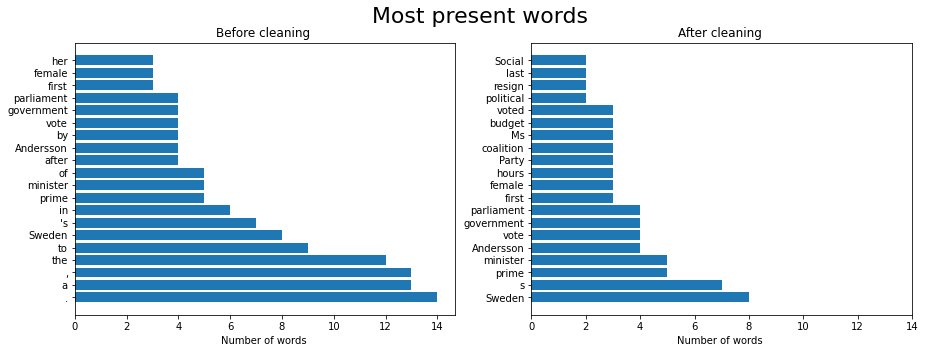

In [59]:
fig, ax = plt.subplots(figsize = (15,5))
fig.suptitle("Most present words", size = 22)

ax1 = plt.subplot(121) 
ax1.barh("Words", data=most_common_words, width="Count")
ax1.set_title("Before cleaning ")
ax1.set_xlabel("Number of words ")
ax1.set_xticks(range(0,15,2))

ax2 = plt.subplot(122)
ax2.barh("Words", data=most_common_words_clean, width="Count")
ax2.set_title("After cleaning ")
ax2.set_xlabel("Number of words ")
ax2.set_xticks(range(0,15,2))

plt.show()